In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
from scipy import integrate as ig
from functions import J0, J0_rad, SQ, Voc_rad, LED_QE, calculate_summary, Vloss_CT, Vloss_SQ
from utils import bb, getAM15, linear, set_up_plot

In [2]:
os.getcwd()

'/home/jungbluth/Desktop/git/Voltage-Loss-Calculations'

In [3]:
T = 293 # [K] ambient & cell temperature
h = 6.626 * 10**(-34) # [kgm^2/s]
h_eV = 4.1357*10**(-15) # eV s
c = 2.998 * 10**(8) # [m/s]
k = 1.3806 * 10**(-23) # [kgm^2/s^2K]
k_eV = 8.6173*10**(-5) # eV / K
q = 1.60217662 * 10**(-19) # [C]
q_eV = 1
Vth = k_eV*T/q_eV # thermal voltage [eV]

### Import sEQE Data

#### (Replace and read in from file !!!)

In [4]:
ZnPc_5 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR46_D_5_ZnPc_C60_2')
ZnPc_25 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR45_D_25_ZnPc_C60_5')
ZnPc_50 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR39_C_50_ZnPc_C60_4')
ZnPc_75 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR45_A_75_ZnPc_C60_4')
ZnPc_95 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR61_D_95_ZnPc_C60_5')
ZnPc_100 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR61_A_100_ZnPc_5')

In [5]:
F4ZnPc_5 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR40_B_5_F4ZnPc_C60_2')
F4ZnPc_25 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR41_B_25_F4ZnPc_C60_2')
F4ZnPc_50 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR40_A_50_F4ZnPc_C60_5')
#F4ZnPc_75 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR41_C_75_F4ZnPc_C60_4')
F4ZnPc_75 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR41_A_75_F4ZnPc_C60_5')
F4ZnPc_95 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR66_B_95_F4ZnPc_C60_2')
F4ZnPc_100 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR66_C_100_F4ZnPc_2')

In [6]:
# F8ZnPc_5 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR55_D_5_F8ZnPc_C60_5')
F8ZnPc_5 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR72_D_5_F8ZnPc_C60_1_(0.5TC)')
F8ZnPc_25 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR43_D_25_F8ZnPc_C60_1')
F8ZnPc_50 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR42_C_50_F8ZnPc_C60_7')
F8ZnPc_75 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR43_A_75_F8ZnPc_C60_4')
F8ZnPc_95 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR56_B_95_F8ZnPc_C60_5')
F8ZnPc_100 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR56_C_100_F8ZnPc_8')

In [7]:
# F16ZnPc_5 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR50_A_5_F16ZnPc_C60_5')
F16ZnPc_5 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR71_B_5_F16ZnPc_C60_2 (2)')
F16ZnPc_25 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR44_D_25_F16ZnPc_C60_1')
F16ZnPc_50 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR50_D_50_F16ZnPc_C60_7')
F16ZnPc_75 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR57_C_75_F16ZnPc_C60_7')
F16ZnPc_95 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR58_D_95_F16ZnPc_C60_1')
#F16ZnPc_100 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR58_A_100_F16ZnPc_5')
F16ZnPc_100 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR72_A_100_F16ZnPc_1_(0.5TC)')

In [9]:
parameters = pd.read_excel('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_Voltage/Voltage_analysis/5_FxZnPc_Summary.xlsx')
parameters.head()

,Material,Number,Voc (V),Err_Voc (V),Jsc (mA/cm2),Err_Jsc (mA/cm2),FF,Err_FF,ECT (eV),Err_ECT (eV),...,Err_Eopt (eV),l (eV),Err_l (eV),f (eV2),Err_f (eV2),T1_exp (eV),T1_calc (eV),EQE File,Best_Voc,Best_Jsc
0,ZnPc,19,0.78,0.02,3.56,0.17,0.40,0.01,1.38,0.01,...,0.01,0.199,0.01,0.004235,0.001388,1.13,1.21,DR46_D_5_ZnPc_C60_2,0.76,3.74
1,F4ZnPc,13,0.89,0.02,3.10,0.17,0.33,0.01,1.45,0.01,...,0.01,0.136,0.03,0.000794,0.000506,1.13,1.20,DR40_B_5_F4ZnPc_C60_2,0.88,3.36
2,F8ZnPc,12,1.14,0.02,1.02,0.05,0.30,0.01,1.59,0.01,...,0.01,0.151,0.01,0.000097,0.000019,NaN,1.25,DR72_D_5_F8ZnPc_C60_1_(0.5TC),1.14,1.09
3,F16ZnPc,15,1.21,0.02,0.82,0.05,0.29,0.01,1.61,0.01,...,0.01,0.159,0.01,0.000035,NaN,NaN,1.18,DR71_B_5_F16ZnPc_C60_2 (2),1.24,0.87
4,C60,11,1.13,0.07,1.08,0.08,0.30,0.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.50,NaN,DR39_D_C60_2,1.26,0.99


### Calculate Relevant Parameters

#### Pull out relevant parameters

In [8]:
columns = parameters['EQE File'][:-1]
samples = [ZnPc_5, F4ZnPc_5, F8ZnPc_5, F16ZnPc_5]

Voc = parameters['Voc (V)'][:-1]
Jsc = parameters['Jsc (mA/cm2)'][:-1]
ECT = parameters['ECT (eV)'][:-1]

In [9]:
summary = calculate_summary(columns, samples, Voc, Jsc, ECT)
summary.head()

,Sample,Jsc [mA/cm2],"J0,rad [mA/cm2]","Voc,rad [V]","Delta Voc, nonrad [V]","Delta Voc, rad [V]",ECT [V],Voc [V],LED QE
0,DR46_D_5_ZnPc_C60_2,3.56,7.658051e-20,1.143369,0.363369,0.236631,1.38,0.78,5.618478e-07
1,DR40_B_5_F4ZnPc_C60_2,3.10,1.562512e-21,1.238141,0.348141,0.211859,1.45,0.89,1.026942e-06
2,DR72_D_5_F8ZnPc_C60_1_(0.5TC),1.02,1.523239e-24,1.385125,0.245125,0.204875,1.59,1.14,6.075149e-05
3,DR71_B_5_F16ZnPc_C60_2 (2),0.82,9.675607e-24,1.332937,0.122937,0.277063,1.61,1.21,7.679602e-03


### Plot Parameters

In [10]:
markersize = 7
capsize = 5

plot_colors = ['#f0d314', '#ff7f1e', '#ed0b4f', '#a80078', '#070d8b']

#### EQE Fitting Results

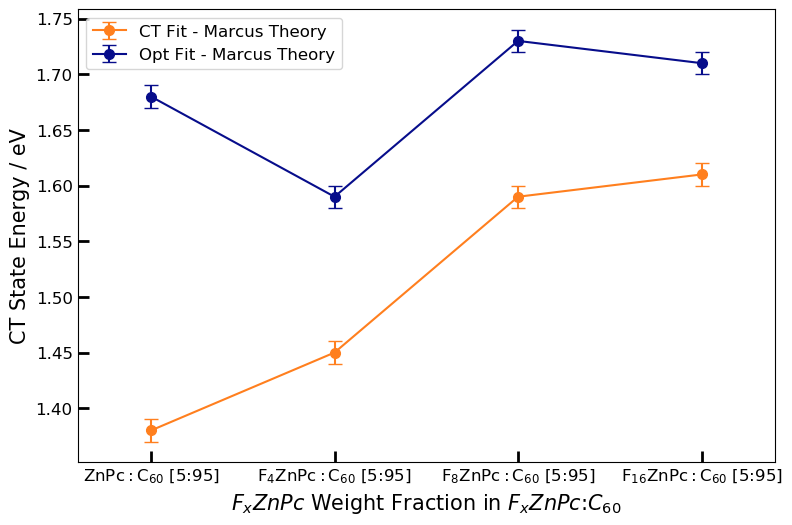

In [12]:
# Plot settings
values = [0.25, 0.50, 0.75, 1]
labels = ['$\mathregular{ZnPc:C_{60}}$ [5:95]', '$\mathregular{F_{4}ZnPc:C_{60}}$ [5:95]', '$\mathregular{F_{8}ZnPc:C_{60}}$ [5:95]', '$\mathregular{F_{16}ZnPc:C_{60}}$ [5:95]']
x_label = '$F_{x}ZnPc$ Weight Fraction in $F_{x}ZnPc$:$C_{60}$'
y_label = 'CT State Energy / eV'
plot_labels = ['CT Fit - Marcus Theory', 'Opt Fit - Marcus Theory']

# Set up & draw plot
fig = set_up_plot(x_label = x_label, y_label = y_label, values = values, labels = labels)

plt.errorbar(values, parameters['ECT (eV)'][:-1], parameters['Err_ECT (eV)'][:-1], marker = 'o', markersize=markersize, capsize=capsize, color=plot_colors[1], label=plot_labels[0])
plt.errorbar(values, parameters['Eopt (eV)'][:-1], parameters['Err_Eopt (eV)'][:-1], marker = 'o', markersize=markersize, capsize=capsize, color=plot_colors[4], label=plot_labels[1])

plt.xlim(0.15, 1.1)
plt.legend(fontsize = 12) #, loc=2, ncol=2, mode="expand", borderaxespad=0.) # bbox_to_anchor=(0.05, 1.1, 0.9, .102),

# plt.savefig('/home/jungbluth/Desktop/FxZnPc_CT_trends.png')

#### CT State & Voltage Trends

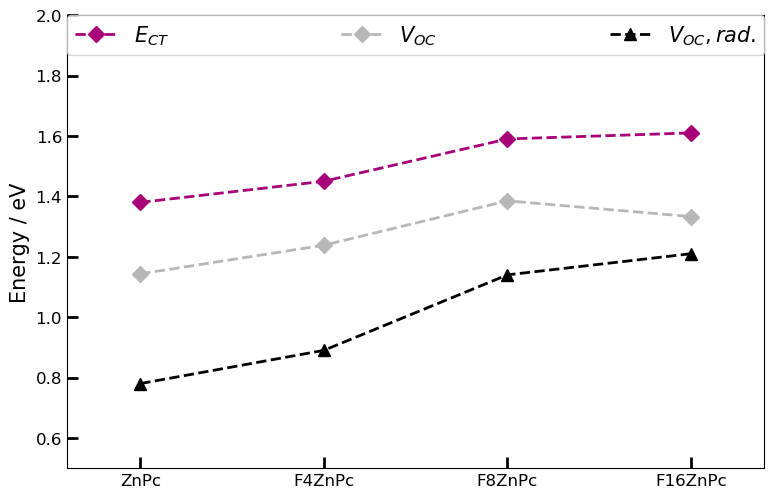

In [23]:
# Plot settings
values = [ 0.25, 0.50, 0.75, 1]
labels = ['ZnPc', 'F4ZnPc', 'F8ZnPc', 'F16ZnPc']
x_label = None
y_label = 'Energy / eV'
plot_labels = ['$E_{CT}$', '$V_{OC}$', '$V_{OC},rad.$']

# Set up & draw plot
fig = set_up_plot(x_label = x_label, y_label = y_label, values = values, labels = labels)

plt.plot(values, summary['ECT [V]'], 'D', markersize=8, linestyle='--', linewidth=2, label=plot_labels[0], color=plot_colors[3])
plt.plot(values, summary['Voc,rad [V]'], 'D', markersize=8, linestyle='--', linewidth=2, label=plot_labels[1], color='#b7b7b7ff')
plt.plot(values, summary['Voc [V]'], '^', markersize=8, linestyle='--', linewidth=2, label=plot_labels[2], color='black')

plt.xlim(0.15, 1.1)
plt.ylim(0.5, 2)
plt.legend(fontsize = 15, loc=2, ncol=3, mode="expand", borderaxespad=0.) # bbox_to_anchor=(0.05, 1.1, 0.9, .102),

# plt.savefig('/home/jungbluth/Desktop/100_FxZnPc_Voc_Trends.png')

#### Compare to IAPP Results

No handles with labels found to put in legend.


KeyError: 'Marcus'

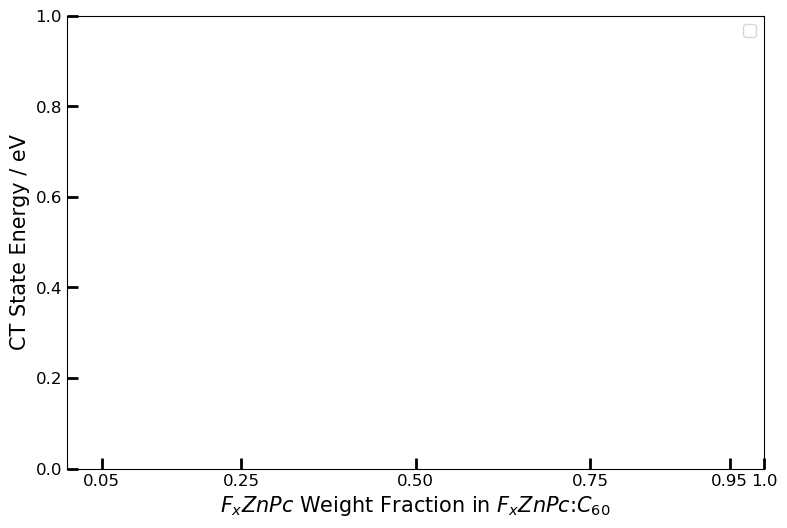

In [32]:
# Plot settings
values = [0.05, 0.25, 0.50, 0.75, 0.95, 1]
labels = ['0.05', '0.25', '0.50', '0.75', '0.95', '1.0']
x_label = '$F_{x}ZnPc$ Weight Fraction in $F_{x}ZnPc$:$C_{60}$'
y_label = 'CT State Energy / eV'
plot_labels = ['ZnPc - ', '$\mathregular{F_{4}ZnPc}$ - ', '$\mathregular{F_{8}ZnPc}$ - ', '$\mathregular{F_{16}ZnPc}$ - ']

# Set up & draw plot
fig = set_up_plot(x_label = x_label, y_label = y_label, values = values, labels = labels)

# Plot my results
plt.plot(values, parameters['Marcus'][0:6], 'o', markersize=8, linestyle='--', linewidth=2, label=labels[0]+'Marcus Theory', color=plot_colors[1])
plt.plot(values, parameters['Marcus'][6:12], '^', markersize=8, linestyle='--', linewidth=2, label=labels[1]+'Marcus Theory', color=plot_colors[2])
plt.plot(values, parameters['Marcus'][12:18], 's', markersize=8, linestyle='--', linewidth=2, label=labels[2]+'Marcus Theory', color=plot_colors[3])
plt.plot(values, parameters['Marcus'][18:24], 'D', markersize=8, linestyle='--', linewidth=2, label=labels[3]+'Marcus Theory', color=plot_colors[4])

# Plot IAPP results
plt.plot(0.04, 1.35, 'X', markersize=8, linestyle='--', linewidth=0, label='ZnPc - IAPP Result', color=plot_colors[1])
plt.plot(0.05, 1.47, 'X', markersize=8, linestyle='--', linewidth=0, label='F4ZnPc - IAPP Result', color=plot_colors[2])
plt.plot(0.05, 1.55, 'X', markersize=8, linestyle='--', linewidth=0, label='F8ZnPc - IAPP Result', color=plot_colors[3])
plt.plot([0.06, 0.55, 0.96], [1.50, 1.45, 1.33], 'X', markersize=8, linestyle='--', linewidth=0, label='F16ZnPc - IAPP Result', color=plot_colors[4])

plt.xlim(0, 1.05)
plt.ylim(1.11, 2.1)
plt.legend(fontsize = 10, loc=2, ncol=2, mode="expand", borderaxespad=0.) # bbox_to_anchor=(0.05, 1.1, 0.9, .102),

#plt.savefig('/home/jungbluth/Desktop/FxZnPc_CT_trends_Marcus_MLJ.png')

#### Open Circuit Voltage

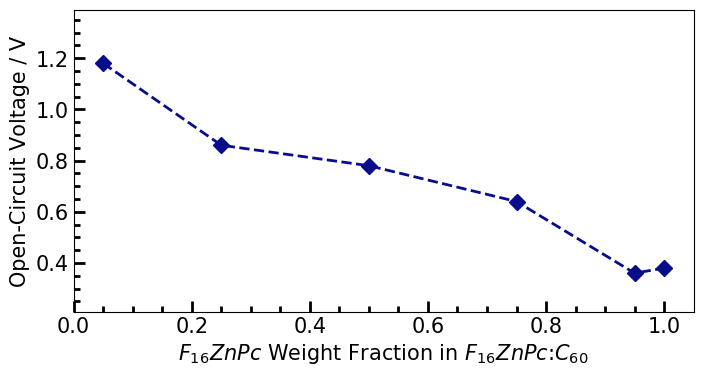

In [69]:
# Plot settings
values = [0.05, 0.25, 0.50, 0.75, 0.95, 1]
x_label = '$F_{16}ZnPc$ Weight Fraction in $F_{16}ZnPc$:$C_{60}$'
y_label = 'Open-Circuit Voltage / V'
figsize=(8,4)

# Set up & draw plot
fig = set_up_plot(x_label = x_label, y_label = y_label, figsize=figsize)

plt.plot(values, parameters['Voc'][18:24], 'D', markersize=8, linestyle='--', linewidth=2, label='$F_{16}ZnPc:C_{60}$', color=plot_colors[4])

plt.ylim(0.21, 1.39)
plt.xlim(0, 1.05)

# plt.savefig('/home/jungbluth/Desktop/F16ZnPc_Voc_trends.png')

#### Short-Circuit Current

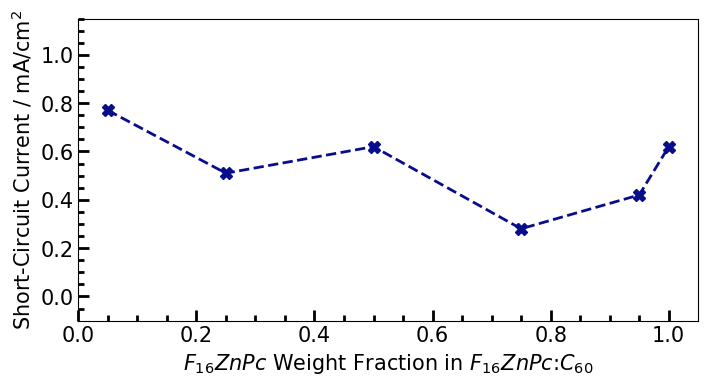

In [77]:
# Plot settings
values = [0.05, 0.25, 0.50, 0.75, 0.95, 1]
x_label = '$F_{16}ZnPc$ Weight Fraction in $F_{16}ZnPc$:$C_{60}$'
y_label = 'Short-Circuit Current / mA/$\mathregular{cm^{2}}$'
figsize=(8,4)

# Set up & draw plot
fig = set_up_plot(x_label = x_label, y_label = y_label, figsize=figsize)

plt.plot(values, parameters['Jsc'][18:24], 'X', markersize=8, linestyle='--', linewidth=2, label='$F_{16}ZnPc:C_{60}$', color=colors[4])

plt.ylim(-0.1, 1.15)
plt.xlim(0, 1.05)

# plt.savefig('/home/jungbluth/Desktop/F16ZnPc_Jsc_trends.png')